In [491]:
import numpy as np
import pandas as pd


In [492]:
#loading the CSV data files
df=pd.read_csv('cardio_train.csv',sep=';')

In [493]:
df.shape

(69301, 13)

In [494]:
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0
5,995,21143,1,164,61.0,100,70,1,1,0,0,1,0
6,996,18085,1,162,72.0,100,70,1,1,0,0,1,0
7,997,22547,1,161,93.0,140,90,2,1,0,0,1,1
8,999,21250,1,157,68.0,110,80,1,1,0,0,1,0
9,1000,22446,1,158,65.0,140,90,3,1,0,0,1,1


In [495]:
df=df.drop(['id'],axis=1)

In [496]:
duplicate=df[df.duplicated()]

In [497]:
duplicate.shape

(24, 12)

In [498]:
df.drop_duplicates(keep='first',inplace=True)

In [499]:
df.shape

(69277, 12)

In [500]:
df.dtypes

age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [501]:
#Checking for missing values
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [502]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [503]:
df['ap_hi'].unique()

array([  130,   110,   120,   100,   140,   160,   170,   150,   147,
         115,    90,   180,    14,   125,   135,   190,   137,   153,
          11,   145,   148,   126,   105,   220,   119,   141,   165,
         164,    12,   124,   172,   902,   162,   906,   117,   134,
         166,   210,   176,   133,   116,   169,    10,   121,    16,
          80,   112,   159,   122,   113,   118,   200,   155,   142,
         131,   157,   136,   146,   138,  -100,   909,    70,   109,
          85,   106,   129,    93,     7,    95,   179,   161,   156,
         168,   132,   104,   103,   178,   175,   123,   128,   151,
          15,   139, 11500,   127,    17,   108,   144,   158,   102,
           1,  1420,    13,   143,   701,   107,   184,   149,   167,
         114,   101,    60,  1500,   181,   171,   202,  -115,   111,
         907,    20,   188,   185,   163,   173,   154,   177,  -140,
         174,  -120, 14020,  1400,   240,   191,   197,  1620,   152,
          96,   199,

In [504]:
df.skew()

age            -0.307408
gender          0.630844
height         -0.633994
weight          1.004679
ap_hi          84.871548
ap_lo          32.096031
cholesterol     1.586939
gluc            2.396910
smoke           2.906909
alco            3.951034
active         -1.531444
cardio          0.001357
dtype: float64

In [505]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69277.000000,69277.000000,69277.000000,69277.000000,69277.000000,69277.000000,69277.000000,69277.000000,69277.000000,69277.000000,69277.000000,69277.000000
mean,19468.871415,1.349597,164.362140,74.205884,128.832787,96.656004,1.366933,1.226525,0.088081,0.053900,0.803975,0.499661
std,2467.386017,0.476846,8.206439,14.384935,154.802512,189.128722,0.680354,0.572330,0.283415,0.225821,0.396990,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17665.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


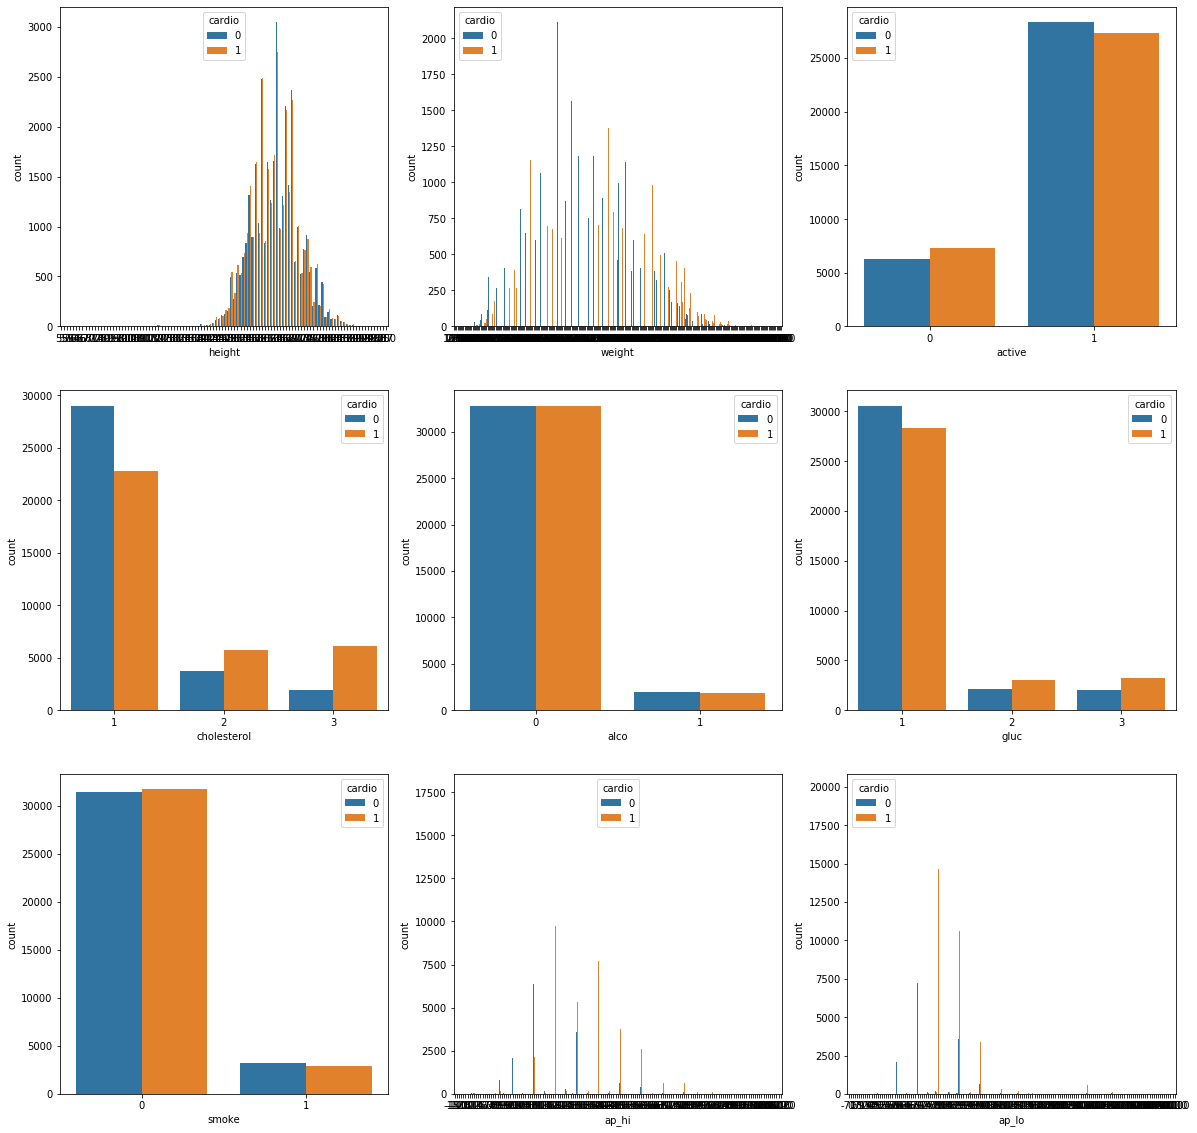

In [506]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,axes=plt.subplots(figsize=(20,20),nrows=3,ncols=3)
sns.countplot(x='height',hue='cardio',data=df,ax=axes[0][0])
sns.countplot(x='weight',hue='cardio',data=df,ax=axes[0][1])
sns.countplot(x='active',hue='cardio',data=df,ax=axes[0][2])
sns.countplot(x='cholesterol',hue='cardio',data=df,ax=axes[1][0])
sns.countplot(x='alco',hue='cardio',data=df,ax=axes[1][1])
sns.countplot(x='gluc',hue='cardio',data=df,ax=axes[1][2])
sns.countplot(x='smoke',hue='cardio',data=df,ax=axes[2][0])
sns.countplot(x='ap_hi',hue='cardio',data=df,ax=axes[2][1])
sns.countplot(x='ap_lo',hue='cardio',data=df,ax=axes[2][2])

(0, 400)

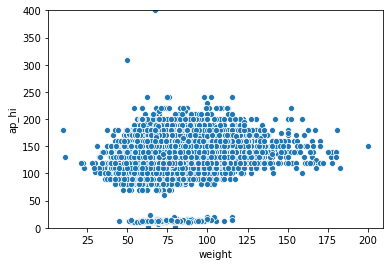

In [507]:
sns.scatterplot(x='weight',y='ap_hi',data=df)
plt.ylim(0,400)

[(0, 400)]

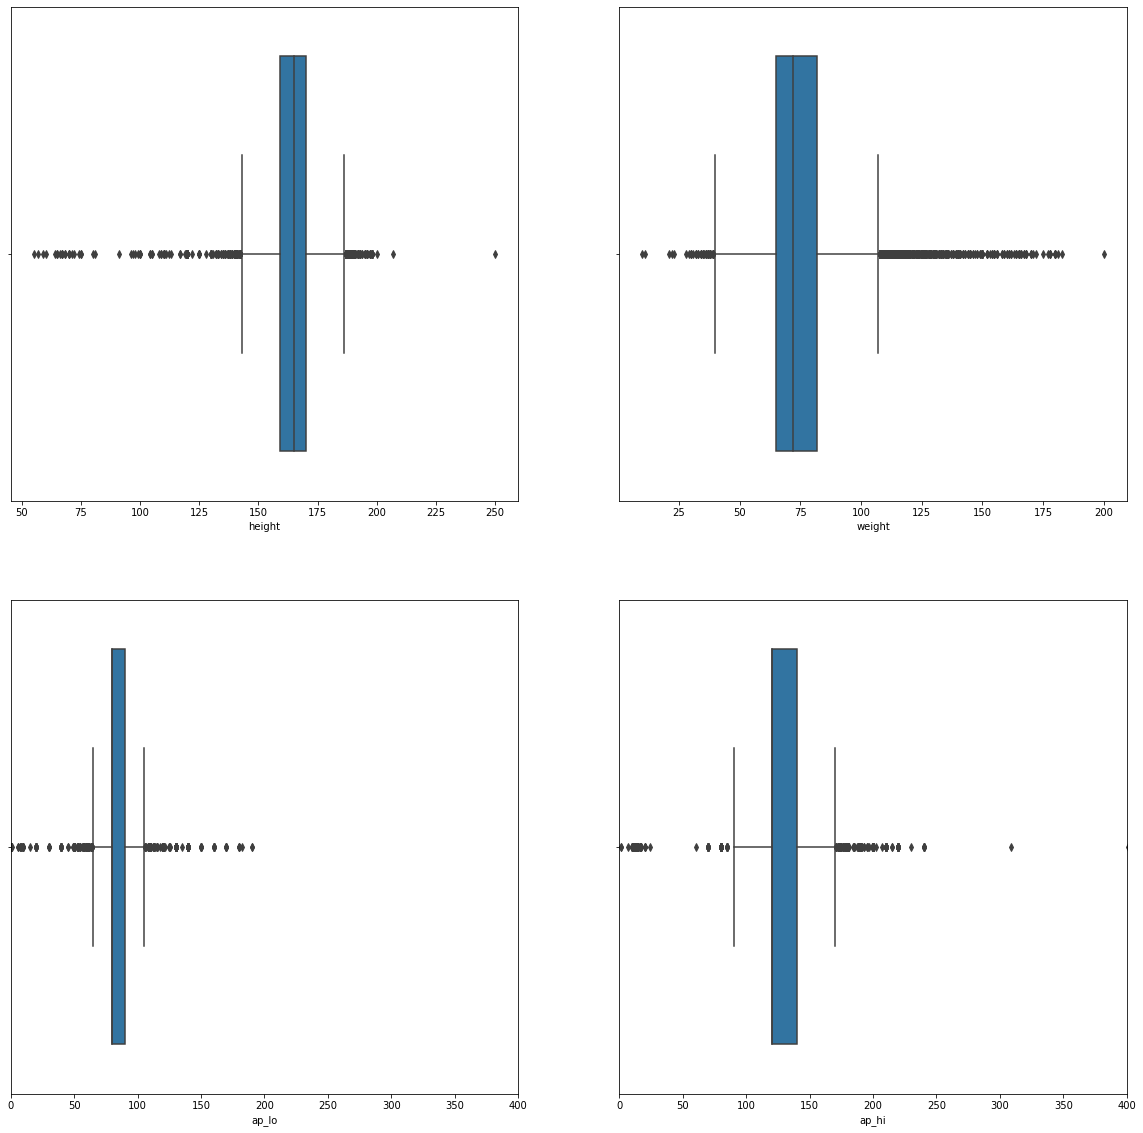

In [508]:
fig,axes=plt.subplots(figsize=(20,20),nrows=2,ncols=2)
sns.boxplot(x='height',hue='cardio',data=df,ax=axes[0][0])
sns.boxplot(x='weight',hue='cardio',data=df,ax=axes[0][1])
ax1=sns.boxplot(x='ap_lo',hue='cardio',data=df,ax=axes[1][0])
ax2=sns.boxplot(x='ap_hi',hue='cardio',data=df,ax=axes[1][1])
ax1.set(xlim=(0,400))
ax2.set(xlim=(0,400))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BB0E360F48>,
      dtype=object)

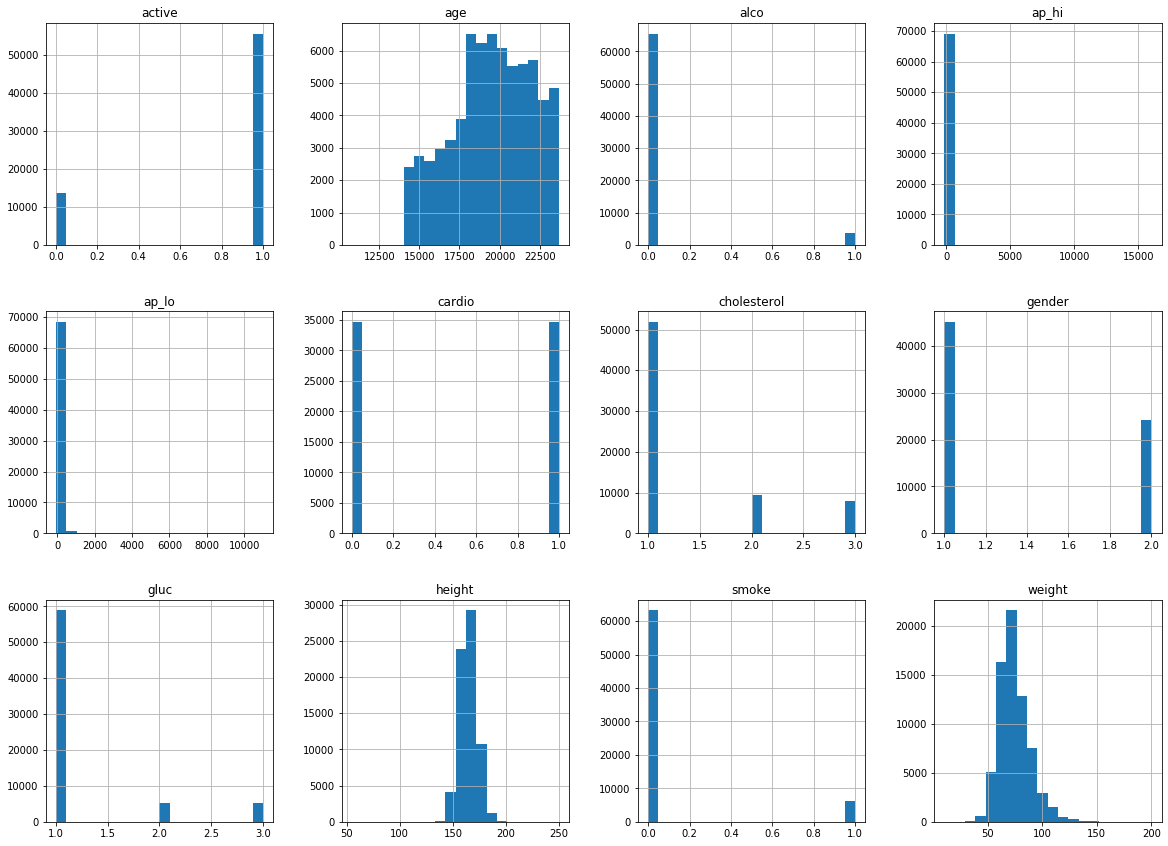

In [509]:
df.hist(figsize=(20,20),grid=True,layout=(4,4),bins=20)

(0, 400)

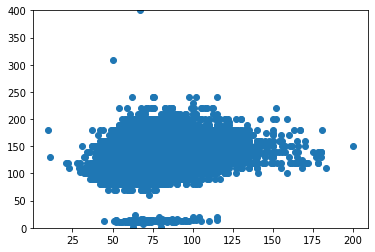

In [510]:
plt.scatter(x='weight',y='ap_hi',data=df)
plt.ylim(0,400)

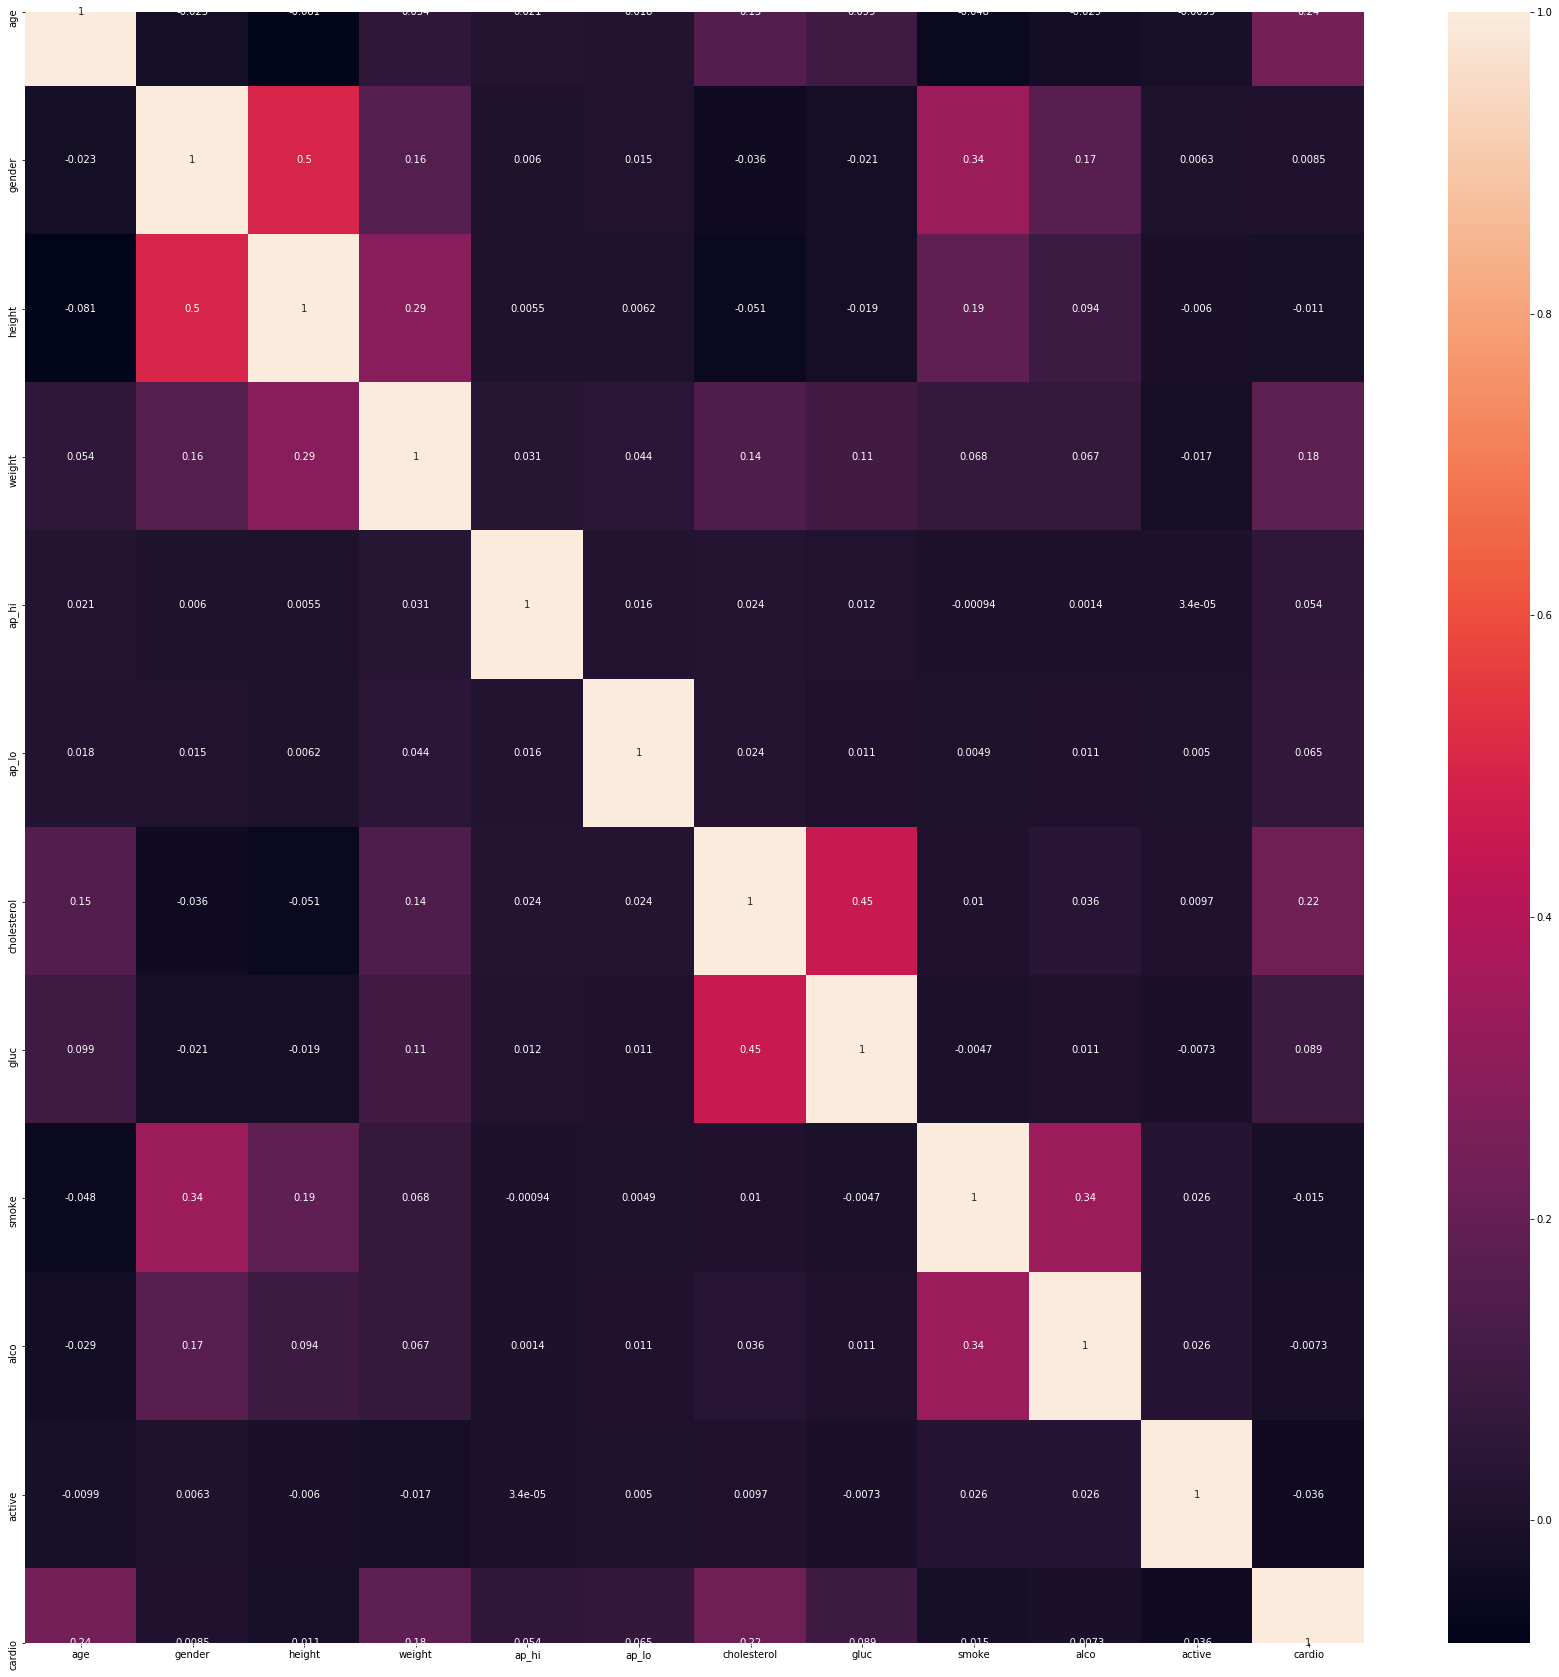

In [511]:
hmap=df.corr()
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(hmap,ax=ax,annot=True)
plt.show()

In [512]:
#Smoking depends on gender
#glucose and cholesterol are dependent on each other
#alcohol and smoke are correlated
#age,cholestrol,weight are the factors affecting cardio

In [513]:
#removing skewness
df['ap_lo']=np.cbrt(df['ap_lo'])
df['ap_hi']=np.cbrt(df['ap_hi'])
df['ap_lo']=np.cbrt(df['ap_lo'])
df['ap_hi']=np.log(df['ap_hi']+1000)

In [514]:
df.skew()

age            -0.307408
gender          0.630844
height         -0.633994
weight          1.004679
ap_hi          15.308181
ap_lo           1.228086
cholesterol     1.586939
gluc            2.396910
smoke           2.906909
alco            3.951034
active         -1.531444
cardio          0.001357
dtype: float64

In [515]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [516]:
np.where(z>3)

(array([    3,     3,    13, ..., 69272, 69273, 69274], dtype=int64),
 array([8, 9, 7, ..., 8, 3, 9], dtype=int64))

In [517]:
df[(z>=3).all(axis=1)].shape

(0, 12)

In [518]:
df.shape

(69277, 12)

In [519]:
df=df[(z<=3).all(axis=1)]

In [485]:
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [520]:
df['bmi'] = df['weight']/ (df['height']/100)**2

In [521]:
df.drop(['height','weight'],axis=1,inplace=True)

In [523]:
x=df.drop(['cardio'],axis=1)
x.head()

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
0,22469,1,6.912808,1.627251,2,2,0,0,1,28.720083
1,14648,1,6.912535,1.603286,1,1,0,0,1,26.722873
2,21901,1,6.912676,1.627251,1,1,0,0,1,25.711662
4,23393,1,6.912676,1.627251,1,1,0,0,1,25.806452
5,21143,1,6.912386,1.603286,1,1,0,0,1,22.679952


In [525]:
y=df.iloc[:,9:10]
y.head()

,cardio
0,0
1,1
2,0
4,0
5,0


In [526]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x=sc.fit_transform(x)



In [527]:
df=df.drop(['cardio'],axis=1)

In [528]:
x=pd.DataFrame(data=x,columns=df.columns)
x.head()

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
0,0.868095,0.0,0.493321,0.505809,0.5,1.0,0.0,0.0,1.0,0.359749
1,0.038808,0.0,0.350061,0.433663,0.0,0.0,0.0,0.0,1.0,0.316113
2,0.807868,0.0,0.423688,0.505809,0.0,0.0,0.0,0.0,1.0,0.294019
3,0.966069,0.0,0.423688,0.505809,0.0,0.0,0.0,0.0,1.0,0.296090
4,0.727494,0.0,0.271813,0.433663,0.0,0.0,0.0,0.0,1.0,0.227781


In [529]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
max_ascore=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=r_state)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    a_scr=accuracy_score(y_test,pred)
    print("accuracy_score corresponding to random state:",r_state,"is:",a_scr)
    if a_scr>max_ascore:
        max_ascore=a_scr
        final_r_state=r_state
print()
print("max accuracy score corresponding to r_state is",final_r_state,"is:",max_ascore)

accuracy_score corresponding to random state: 42 is: 0.7244749301930314
accuracy_score corresponding to random state: 43 is: 0.7289668568653636
accuracy_score corresponding to random state: 44 is: 0.7273886123588685
accuracy_score corresponding to random state: 45 is: 0.7319412407429889
accuracy_score corresponding to random state: 46 is: 0.7251426490227024
accuracy_score corresponding to random state: 47 is: 0.730180891101129
accuracy_score corresponding to random state: 48 is: 0.7266601918174093
accuracy_score corresponding to random state: 49 is: 0.7237465096515722
accuracy_score corresponding to random state: 50 is: 0.7275707174942333
accuracy_score corresponding to random state: 51 is: 0.7275100157824451
accuracy_score corresponding to random state: 52 is: 0.7324268544372952
accuracy_score corresponding to random state: 53 is: 0.7232001942454778
accuracy_score corresponding to random state: 54 is: 0.7281777346121161
accuracy_score corresponding to random state: 55 is: 0.7273279106

In [530]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

dec = DecisionTreeClassifier()
ran = RandomForestClassifier(n_estimators=100)
knn = KNeighborsClassifier(n_neighbors=100)
svm = SVC(random_state=1)
naive = GaussianNB()

models = {"Decision tree" : dec,
          "Random forest" : ran,
          "KNN" : knn,
          "SVM" : svm,
          "Naive bayes" : naive}
scores= { }

for key, value in models.items():    
    model = value
    model.fit(x_train, y_train)
    scores[key] = model.score(x_test, y_test)

In [532]:
scores_frame = pd.DataFrame(scores, index=["Accuracy Score"]).T
scores_frame.sort_values(by=["Accuracy Score"], axis=0 ,ascending=False, inplace=True)
scores_frame

,Accuracy Score
SVM,0.733580
KNN,0.731577
Naive bayes,0.710635
Random forest,0.702440
Decision tree,0.638703


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

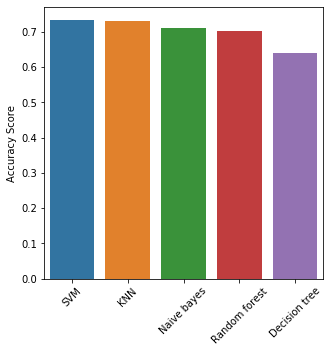

In [533]:
plt.figure(figsize=(5,5))
sns.barplot(x=scores_frame.index,y=scores_frame["Accuracy Score"])
plt.xticks(rotation=45)

In [357]:
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import f1_score
#model=RandomForestClassifier()
#from sklearn.model_selection import GridSearchCV

#params = {
    #'max_depth': [5,10, 15, 20, 25, None],    
    #'min_samples_leaf': [1, 2, 4],
    #'min_samples_split': [2, 5, 10],
    #'n_estimators': [25, 50, 100, 200]}

#grid_search = GridSearchCV(model, params, cv = 3)

In [360]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [361]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [534]:
model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
model.fit(x_train, y_train) 

def evaluate(x, y, dataset):
    pred = model.predict(x)
    score = model.score(x, y)    
    f1_scr=f1_score(y,pred,average='weighted')
    print("The score is:",score)
    print("The F1 Score is:",f1_scr)
        
evaluate(x_train, y_train, 'training')
evaluate(x_test, y_test, 'test')

The score is: 0.7543380420926663
The F1 Score is: 0.7530425918400304
The score is: 0.7334587835376958
The F1 Score is: 0.7323534838378598


In [535]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model,x,y,cv=5)
print('Score:',score)

Score: [0.72985523 0.74005281 0.73431667 0.73392825 0.73156074]


In [536]:
from sklearn.externals import joblib
joblib.dump(model,'Cardi_Disease_classification.pkl')

['Cardi_Disease_classification.pkl']